In [3]:
import pennylane as qml
from qoop.core import ansatz, state
import pennylane.numpy as nps
import qiskit
import numpy as np
from scipy.stats import unitary_group
from qiskit.circuit.library import UnitaryGate
num_qubits = 3
dev = qml.device("default.qubit")

qc = qiskit.QuantumCircuit(num_qubits)

u = UnitaryGate(unitary_group.rvs(2**num_qubits))

qc.append(u, range(num_qubits))
qcx = qiskit.transpile(qc, basis_gates=['h','s','cx','u','rx','ry','rz'], optimization_level=3)

@qml.qnode(dev, diff_method="parameter-shift")
def circuit2(thetas):
    for i in range(0, len(thetas), 3):
        qml.RX(thetas[i], wires = 0)
        qml.RY(thetas[i+1], wires = 1)
        qml.RZ(thetas[i+2], wires = 2)
        qml.CNOT(wires = [0, 1])
        qml.CNOT(wires = [1, 2])
    qml.from_qiskit(qcx)
    return qml.expval(qml.PauliZ(0))
    

def cost(thetas):
    return 1 - circuit2(thetas)

thetas = nps.random.uniform(0, 2*nps.pi, 18, requires_grad=True)
steps = 10
costs = []
opt = qml.AdamOptimizer(stepsize = 0.1)
for n in range(steps):
    thetas, prev_cost = opt.step_and_cost(cost, thetas)
    if prev_cost < 10^(-6):
        print("Achieved error threshold at step", n)
        break
    costs.append(prev_cost)

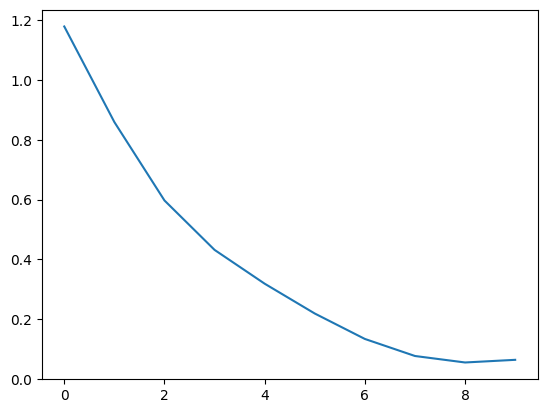

In [4]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [8]:
from qoop.compilation.qcompilation import QuantumCompilation
from qoop.core import ansatz, state
import qiskit
import numpy as np

num_qubits = 3

arr = np.random.uniform(0, 2*np.pi, 2**num_qubits)
arrx = arr.copy()
noise = np.random.normal(0, 0.01, arrx.shape)
arrx += noise
arrx = arrx/np.linalg.norm(arrx)
arr = arr/np.linalg.norm(arr)


In [ ]:
compiler = QuantumCompilation(
    u = ansatz.g2gn(num_qubits, 2),
    vdagger = arr
)

compiler.fit(num_steps=100)

{'loss_fubini_study': [0.8969190617769869, 0.7561316174092836, 0.6482310207079794, 0.5827244484643193, 0.5038705687708321, 0.39592520731050257, 0.2714094115020105, 0.17710723006830884, 0.17258128557052918, 0.2068375118899263, 0.2244965311539976, 0.22066162076514204, 0.20272920949067597, 0.17577559871401743, 0.14297064636072515, 0.10962307986100528, 0.08221158633366883, 0.06521783193209693, 0.059826652929909345, 0.06294836828211682, 0.06770156245195452, 0.06836491285780814, 0.06312007111240067, 0.053753964864051915, 0.04376804093716375, 0.03526035386901147, 0.027679316834031468, 0.021123218100583364, 0.01886020394442495, 0.021423164330360372, 0.02418034264906612, 0.02449932759068188, 0.02240064969513942, 0.018934442030965514, 0.015190663456570849, 0.011789189018556398, 0.008946418749331976, 0.0070958554369208345, 0.0068071238276481965, 0.007486677574495389, 0.008007574122215724, 0.00787980834361914, 0.007083630049689418, 0.0057833971510064105, 0.004270366694133861, 0.002955440404295481,

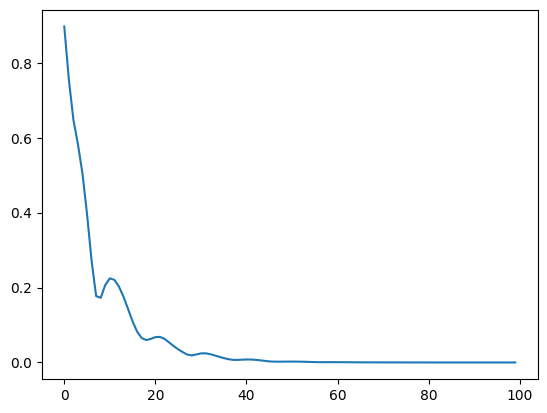

In [3]:
import matplotlib.pyplot as plt

In [4]:
compiler.thetass[-1]

array([0.70417247, 0.89063917, 1.67095923, 1.5908996 , 1.331485  ,
       1.67095923, 0.17523263, 0.41522048, 1.05621715, 0.47598753,
       0.61024554, 0.77322406, 1.21351923, 0.94769577, 0.77322406,
       1.51898563, 0.98159572, 0.96692506])

In [9]:
compiler1 = QuantumCompilation(
    u = ansatz.g2gn(num_qubits, 2),
    vdagger = arrx,
    thetas = compiler.thetass[-1]
)

compiler1.fit(num_steps=100)

/Users/vutuanhai/Documents/GitHub/QuantumCompresser/qoop/core/state.py:273: UserWarning: The input state is not normalized, we will normalize it for you
  warnings.warn("The input state is not normalized, we will normalize it for you")


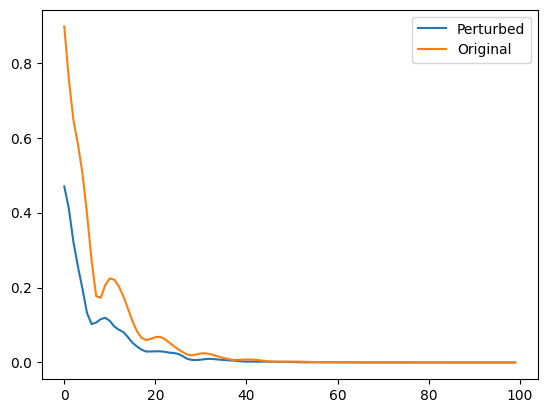

In [10]:

plt.plot(compiler1.metrics['loss_fubini_study'], label="Perturbed")
plt.plot(compiler.metrics['loss_fubini_study'], label="Original")
plt.legend()

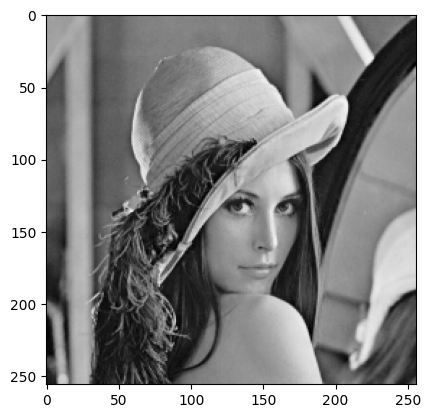

In [28]:
# read lenna and resize at 28 x 28 and save it
import cv2
from utils import divide_image
img = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))
plt.imshow(img, cmap='gray')

In [30]:

blocks, scales = divide_image(img, 2)
blocks

block_differences = [np.linalg.norm(blocks[i] - blocks[i+1]) / np.linalg.norm(blocks[i]) * 100 for i in range(len(blocks)-1)]
block_differences

[1.0669044263152176,
 0.895527280033423,
 0.5070277228942697,
 1.6764215305441532,
 0.9063164926377743,
 0.0,
 0.0,
 0.0,
 0.5917082073991162,
 0.01700275426189025,
 1.0175707354955856,
 0.24475201932343243,
 0.8926540026880382,
 0.5052700099611289,
 4.468315980767019,
 3.339586266326744,
 4.456407289175407,
 1.0254733492696544,
 0.4668285017263302,
 1.2766097985168157,
 1.2693672422645967,
 1.0990508249797322,
 0.6902924352990913,
 0.007002310749677497,
 1.694976107489006,
 0.36974834854788935,
 0.7058320942402451,
 1.1669115893372863,
 1.1378678971147471,
 0.013520821973285064,
 1.9928678233425152,
 0.9461342782166646,
 0.9177623273991395,
 0.30415160706370786,
 0.360777126055884,
 0.7192647408582814,
 1.0725987332241276,
 0.358402991295131,
 0.36584271720725037,
 0.6968598814009797,
 0.34843046946064427,
 0.0,
 0.0,
 0.3460192076629558,
 0.3460192076629558,
 0.3460192076629558,
 0.3460192076629558,
 0.0,
 0.34364108991395165,
 0.002378121283680328,
 0.6920042388341904,
 1.2351188119

In [31]:
import autograd.numpy as np
from autograd import grad

# Định nghĩa hàm f(theta, x): R^d x R^n -> R (scalar output)
def f(theta, x):
    # Ví dụ đơn giản: f(theta, x) = theta^T * x
    return np.dot(theta, x)

# Kích thước của theta và x (ví dụ: 3)
d = 3
n = 3

# Khởi tạo giá trị theta* và x
theta_star = np.array([1.0, 2.0, 3.0])
x = np.array([4.0, 5.0, 6.0])

# Tính giá trị k = f(theta*, x)
k = f(theta_star, x)
print("k =", k)

# Giả sử x bị nhiễu epsilon
epsilon = np.array([0.1, -0.2, 0.05])
y = x + epsilon

# Tính gradient của f theo theta và theo x tại (theta*, x)
grad_theta_f = grad(f, 0)  # gradient theo biến theta
grad_x_f = grad(f, 1)      # gradient theo biến x

grad_theta = grad_theta_f(theta_star, x)
grad_x = grad_x_f(theta_star, x)

print("grad_theta at (theta*, x) =", grad_theta)
print("grad_x at (theta*, x) =", grad_x)

# Công thức cập nhật:
#   theta' = theta* - (grad_x^T * epsilon)/(||grad_theta||^2) * grad_theta
numerator = np.dot(grad_x, epsilon)
denom = np.linalg.norm(grad_theta)**2

alpha = - numerator / denom

theta_prime = theta_star + alpha * grad_theta

print("Updated theta (theta') =", theta_prime)

# Kiểm tra giá trị f(theta', y) (nếu xấp xỉ tốt thì f(theta', y) ~ k)
f_theta_prime_y = f(theta_prime, y)
print("f(theta', y) =", f_theta_prime_y)


k = 32.0
grad_theta at (theta*, x) = [4. 5. 6.]
grad_x at (theta*, x) = [1. 2. 3.]
Updated theta (theta') = [1.00779221 2.00974026 3.01168831]
f(theta', y) = 31.999415584415583
